In [1]:
# ###########################################################################################################################
# This project is part of Springboard Data Science Track Career Track for data visualization and exploratory data Analysis  #
# in python.  
#
# This projects uses the data downloaded from 'https://www.divvybikes.com/' in the form of .csv files. for the years        #
# 2014
#
# The csv files are combined using Pandas
#                                                                                                                           #
#                                                                                                                           #                                                                                                                          #
# # ########################################################################################################################
 

### Combining csv files for 2014 and create new dataframe trips_2014

In [2]:
#importing required modules

import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
#reading all csv for 2014 and concatenate to dataframe
%%time

trips_2014=pd.concat([pd.read_csv(f,parse_dates=['starttime','stoptime']) for f in glob.glob("Divvy_Trips_2014*.csv")],ignore_index=True)


Wall time: 9min 30s


In [5]:
trips_2014.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,2886259,2014-07-31 23:56:00,2014-08-01 00:03:00,2602,386,291,Wells St & Evergreen Ave,53,Wells St & Erie St,Subscriber,Female,1979.0
1,2886258,2014-07-31 23:58:00,2014-08-01 00:07:00,2403,495,98,LaSalle St & Washington St,106,State St & Pearson St,Subscriber,Male,1974.0
2,2886257,2014-07-31 23:58:00,2014-08-01 02:10:00,669,7947,240,Sheridan Rd & Irving Park Rd,240,Sheridan Rd & Irving Park Rd,Customer,NaN,NaN
3,2886256,2014-07-31 23:58:00,2014-08-01 00:19:00,2431,1282,47,State St & Kinzie St,14,Morgan St & 18th St,Customer,NaN,NaN
4,2886255,2014-07-31 23:57:00,2014-08-01 02:10:00,2885,7972,240,Sheridan Rd & Irving Park Rd,240,Sheridan Rd & Irving Park Rd,Customer,NaN,NaN


# data for 2014

In [6]:
trips_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454634 entries, 0 to 2454633
Data columns (total 12 columns):
trip_id              int64
starttime            datetime64[ns]
stoptime             datetime64[ns]
bikeid               int64
tripduration         int64
from_station_id      int64
from_station_name    object
to_station_id        int64
to_station_name      object
usertype             object
gender               object
birthyear            float64
dtypes: datetime64[ns](2), float64(1), int64(5), object(4)
memory usage: 224.7+ MB


In [261]:
#getting required columns only

trips_2014 = trips_2014[['from_station_name','starttime','tripduration','usertype','gender','birthyear','from_station_id','to_station_id','to_station_name']]

In [9]:
#function to get null values

def get_null_values(df):
    null_columns=df.columns[df.isnull().any()]
    
    return df[null_columns].isnull().sum()
    

In [10]:
#function to get rows with null values
def print_rows_With_null_value(df):
    df1 = df[df.isnull().any(axis=1)]
    
    return(df1.head())
    

In [265]:
#to avoid warnings
pd.options.mode.chained_assignment = None

In [266]:
#get year,month ,week,hour from starttime column of dataframe


def get_tripduration_break_up(df):
    date = np.array(list(map(lambda x: (x.year, x.month, x.week, x.dayofweek, x.hour), df['starttime'])))
    df['year']=date[:,0]
    df['month']=date[:,1]
    df['week']=date[:,2]
    df['day']=date[:,3]
    df['hour'] = date[:, 4]
    df['Trip_Min'] = df['tripduration']/60.0
    df['Age'] = df['year']-df['birthyear']
    
    return df


In [268]:
new_2014=get_tripduration_break_up(trips_2014)
new_2014

,from_station_name,starttime,tripduration,usertype,gender,birthyear,from_station_id,to_station_id,to_station_name,year,month,week,day,hour,Trip_Min,Age
0,Wells St & Evergreen Ave,2014-07-31 23:56:00,386,Subscriber,Female,1979.0,291,53,Wells St & Erie St,2014,7,31,3,23,6.433333,35.0
1,LaSalle St & Washington St,2014-07-31 23:58:00,495,Subscriber,Male,1974.0,98,106,State St & Pearson St,2014,7,31,3,23,8.250000,40.0
2,Sheridan Rd & Irving Park Rd,2014-07-31 23:58:00,7947,Customer,NaN,NaN,240,240,Sheridan Rd & Irving Park Rd,2014,7,31,3,23,132.450000,NaN
3,State St & Kinzie St,2014-07-31 23:58:00,1282,Customer,NaN,NaN,47,14,Morgan St & 18th St,2014,7,31,3,23,21.366667,NaN
4,Sheridan Rd & Irving Park Rd,2014-07-31 23:57:00,7972,Customer,NaN,NaN,240,240,Sheridan Rd & Irving Park Rd,2014,7,31,3,23,132.866667,NaN
5,Larrabee St & Menomonee St,2014-07-31 23:57:00,9067,Customer,NaN,NaN,28,28,Larrabee St & Menomonee St,2014,7,31,3,23,151.116667,NaN
6,Indiana Ave & Roosevelt Rd,2014-07-31 23:57:00,6006,Customer,NaN,NaN,255,181,LaSalle St & Illinois St,2014,7,31,3,23,100.100000,NaN
7,Larrabee St & Armitage Ave,2014-07-31 23:56:00,1161,Customer,NaN,NaN,288,17,Wood St & Division St,2014,7,31,3,23,19.350000,NaN
8,Noble St & Milwaukee Ave,2014-07-31 23:56:00,824,Customer,NaN,NaN,29,47,State St & Kinzie St,2014,7,31,3,23,13.733333,NaN
9,Larrabee St & Menomonee St,2014-07-31 23:56:00,9142,Customer,NaN,NaN,28,28,Larrabee St & Menomonee St,2014,7,31,3,23,152.366667,NaN


In [269]:
get_null_values(new_2014)

gender       791280
birthyear    791216
Age          791216
dtype: int64

# Dropping Null Values

In [14]:
#drop null values
new_Df_2014=new_2014.dropna()


In [15]:
new_Df_2014.head()

,from_station_name,starttime,tripduration,usertype,gender,birthyear,from_station_id,to_station_id,to_station_name,year,month,week,day,hour,Trip_Min,Age
0,Wells St & Evergreen Ave,2014-07-31 23:56:00,386,Subscriber,Female,1979.0,291,53,Wells St & Erie St,2014,7,31,3,23,6.433333,35.0
1,LaSalle St & Washington St,2014-07-31 23:58:00,495,Subscriber,Male,1974.0,98,106,State St & Pearson St,2014,7,31,3,23,8.250000,40.0
10,Ashland Ave & Belle Plaine Ave,2014-07-31 23:56:00,505,Subscriber,Male,1988.0,246,326,Clark St & Leland Ave,2014,7,31,3,23,8.416667,26.0
11,Wells St & Evergreen Ave,2014-07-31 23:56:00,464,Subscriber,Female,1988.0,291,106,State St & Pearson St,2014,7,31,3,23,7.733333,26.0
13,Bissell St & Armitage Ave,2014-07-31 23:56:00,1121,Subscriber,Male,1986.0,113,289,Wells St & Concord Ln,2014,7,31,3,23,18.683333,28.0


In [16]:
a =new_Df_2014.usertype.value_counts().sort_values(ascending=False)
a

Subscriber    1663185
Customer           91
Name: usertype, dtype: int64

In [17]:
customer_data=new_Df_2014[new_Df_2014['usertype']=='Customer']

In [18]:
subscriber_data=new_Df_2014[new_Df_2014['usertype']=='Subscriber']
subscriber_data.columns

Index(['from_station_name', 'starttime', 'tripduration', 'usertype', 'gender',
       'birthyear', 'from_station_id', 'to_station_id', 'to_station_name',
       'year', 'month', 'week', 'day', 'hour', 'Trip_Min', 'Age'],
      dtype='object')

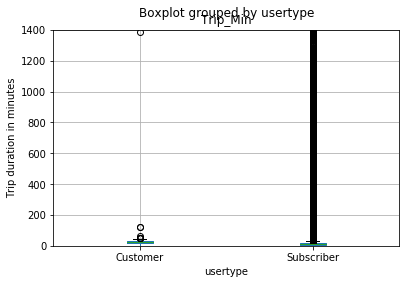

In [19]:
slice =new_Df_2014.loc[:,['Trip_Min','usertype']]
#print(slice.head)
bp = slice.boxplot(column='Trip_Min', by='usertype')
axes = plt.gca()
axes.set_ylim([0,1400])
axes.set_ylabel('Trip duration in minutes')
plt.show()


In [20]:
new_Df_2014.groupby('usertype')['Trip_Min'].mean()


usertype
Customer      40.699267
Subscriber    11.940942
Name: Trip_Min, dtype: float64

In [21]:
new_Df_2014.groupby('gender')['Trip_Min'].mean()



gender
Female    13.839620
Male      11.326661
Name: Trip_Min, dtype: float64

In [23]:
subscriber_data.describe()

,tripduration,birthyear,from_station_id,to_station_id,year,month,week,day,hour,Trip_Min,Age
count,1.663185e+06,1.663185e+06,1.663185e+06,1.663185e+06,1663185.0,1.663185e+06,1.663185e+06,1.663185e+06,1.663185e+06,1.663185e+06,1.663185e+06
mean,7.164565e+02,1.978596e+03,1.625606e+02,1.635922e+02,2014.0,7.396587e+00,3.050228e+01,2.711406e+00,1.371232e+01,1.194094e+01,3.540411e+01
std,1.222131e+03,1.045830e+01,9.825263e+01,9.871508e+01,0.0,2.502356e+00,1.091212e+01,1.883875e+00,4.882956e+00,2.036884e+01,1.045830e+01
min,6.000000e+01,1.898000e+03,5.000000e+00,5.000000e+00,2014.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.600000e+01
25%,3.580000e+02,1.973000e+03,7.500000e+01,7.500000e+01,2014.0,6.000000e+00,2.300000e+01,1.000000e+00,9.000000e+00,5.966667e+00,2.800000e+01
50%,5.740000e+02,1.982000e+03,1.560000e+02,1.560000e+02,2014.0,7.000000e+00,3.100000e+01,3.000000e+00,1.500000e+01,9.566667e+00,3.200000e+01
75%,9.070000e+02,1.986000e+03,2.420000e+02,2.450000e+02,2014.0,9.000000e+00,3.900000e+01,4.000000e+00,1.700000e+01,1.511667e+01,4.100000e+01
max,8.594200e+04,1.998000e+03,3.510000e+02,3.510000e+02,2014.0,1.200000e+01,5.200000e+01,6.000000e+00,2.300000e+01,1.432367e+03,1.160000e+02


# Lets remove the possible outliers of Age greater than 100 and focus on Minimum Trip Duration greater than 5 min.


In [24]:
mask1=((subscriber_data.Trip_Min > 3) & (subscriber_data.Age < 100))

subscriber_data= subscriber_data[mask1]

subscriber_data.describe()

,tripduration,birthyear,from_station_id,to_station_id,year,month,week,day,hour,Trip_Min,Age
count,1.585284e+06,1.585284e+06,1.585284e+06,1.585284e+06,1585284.0,1.585284e+06,1.585284e+06,1.585284e+06,1.585284e+06,1.585284e+06,1.585284e+06
mean,7.444713e+02,1.978545e+03,1.620237e+02,1.632838e+02,2014.0,7.388192e+00,3.047371e+01,2.710938e+00,1.371458e+01,1.240785e+01,3.545496e+01
std,1.244979e+03,1.036459e+01,9.817853e+01,9.869790e+01,0.0,2.491013e+00,1.086028e+01,1.883854e+00,4.868735e+00,2.074965e+01,1.036459e+01
min,1.810000e+02,1.915000e+03,5.000000e+00,5.000000e+00,2014.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.016667e+00,1.600000e+01
25%,3.850000e+02,1.973000e+03,7.400000e+01,7.500000e+01,2014.0,6.000000e+00,2.300000e+01,1.000000e+00,9.000000e+00,6.416667e+00,2.800000e+01
50%,5.980000e+02,1.982000e+03,1.560000e+02,1.560000e+02,2014.0,7.000000e+00,3.100000e+01,3.000000e+00,1.500000e+01,9.966667e+00,3.200000e+01
75%,9.290000e+02,1.986000e+03,2.410000e+02,2.450000e+02,2014.0,9.000000e+00,3.900000e+01,4.000000e+00,1.700000e+01,1.548333e+01,4.100000e+01
max,8.594200e+04,1.998000e+03,3.510000e+02,3.510000e+02,2014.0,1.200000e+01,5.200000e+01,6.000000e+00,2.300000e+01,1.432367e+03,9.900000e+01


# Lets divide this dataset as per USA seasons monthwise

In [25]:

spring = subscriber_data['month'].isin([3,4,5])
spring_df= subscriber_data[spring]

#spring_df['Trip_Min'].plot(kind='box')


In [26]:
Summer = subscriber_data['month'].isin([6,7,8])
summer_df = subscriber_data[Summer]

In [27]:
fall = subscriber_data['month'].isin([9,10,11])
fall_df = subscriber_data[fall]

In [28]:
winter = subscriber_data['month'].isin([12,1,2])
winter_df = subscriber_data[winter]

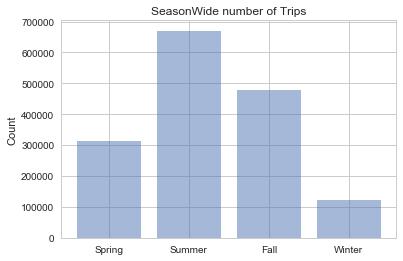

In [270]:
labels = ('Spring','Summer','Fall','Winter')
y_pos = np.arange(len(labels))
seasons = [len(spring_df),len(summer_df),len(fall_df),len(winter_df)]
plt.bar(y_pos,seasons,align='center',alpha=0.5)
plt.xticks(y_pos,labels)
plt.ylabel('Count')
plt.title('SeasonWide number of Trips')
plt.show()


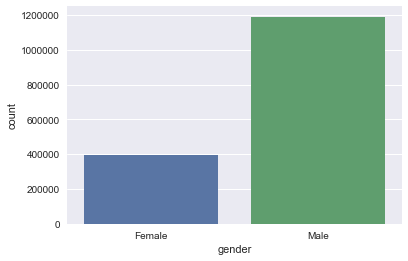

In [30]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="gender", data=subscriber_data)

C:\Users\Sushama\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


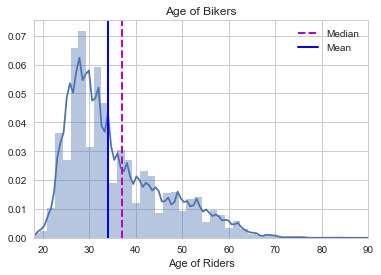

In [271]:

mean = np.mean(winter_df.Age)
median = np.median(winter_df.Age)

fig, ax = plt.subplots()
sns.distplot(subscriber_data['Age'], ax=ax)

# Customize the labels and limits
ax.set(xlabel="Age of Riders", xlim=(18,90), title="Age of Bikers")

# Add vertical lines for the median and mean
ax.axvline(x=mean, color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=median, color='b', label='Mean', linestyle='-', linewidth=2)

# Show the legend and plot the data
ax.legend()
plt.show()


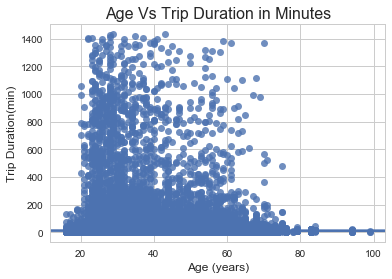

<Figure size 432x288 with 0 Axes>

In [272]:
fig, ax = plt.subplots()

sns.set_style('whitegrid')

sns.regplot(data=subscriber_data,
           x='Age',
           y='Trip_Min')
ax.set_title('Age Vs Trip Duration in Minutes', fontsize=16)
ax.set_xlabel('Age (years)', fontsize=12)
ax.set_ylabel('Trip Duration(min)', fontsize=12)

plt.show()
plt.clf()

In [33]:
## Monthly Data Visualization

# Monthly Data Visualization

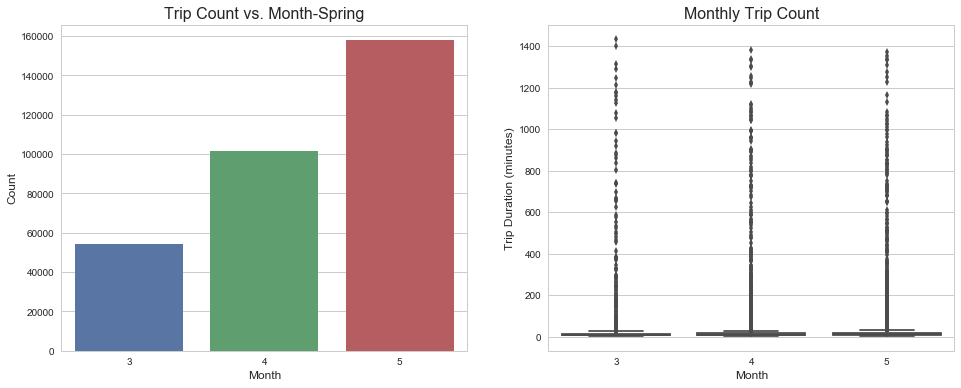

In [34]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='month', data=spring_df, ax=ax[0])
ax[0].set_title('Trip Count vs. Month-Spring', fontsize=16)
ax[0].set_xlabel('Month', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='month', y='Trip_Min', data=spring_df, ax=ax[1])
ax[1].set_title('Monthly Trip Count', fontsize=16)
ax[1].set_xlabel('Month', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()

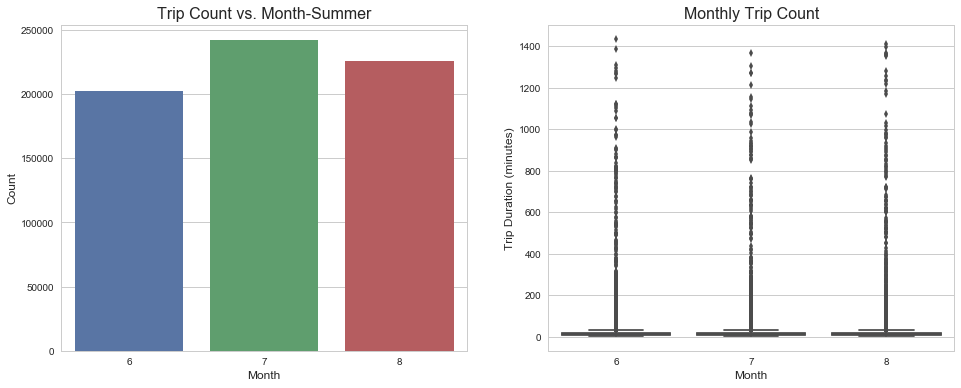

In [35]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='month', data=summer_df, ax=ax[0])
ax[0].set_title('Trip Count vs. Month-Summer', fontsize=16)
ax[0].set_xlabel('Month', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='month', y='Trip_Min', data=summer_df, ax=ax[1])
ax[1].set_title('Monthly Trip Count', fontsize=16)
ax[1].set_xlabel('Month', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()

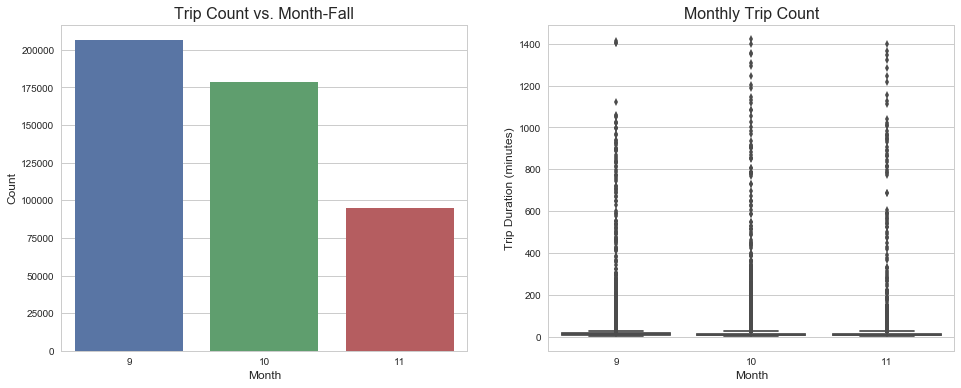

In [36]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='month', data=fall_df, ax=ax[0])
ax[0].set_title('Trip Count vs. Month-Fall', fontsize=16)
ax[0].set_xlabel('Month', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='month', y='Trip_Min', data=fall_df, ax=ax[1])
ax[1].set_title('Monthly Trip Count', fontsize=16)
ax[1].set_xlabel('Month', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()

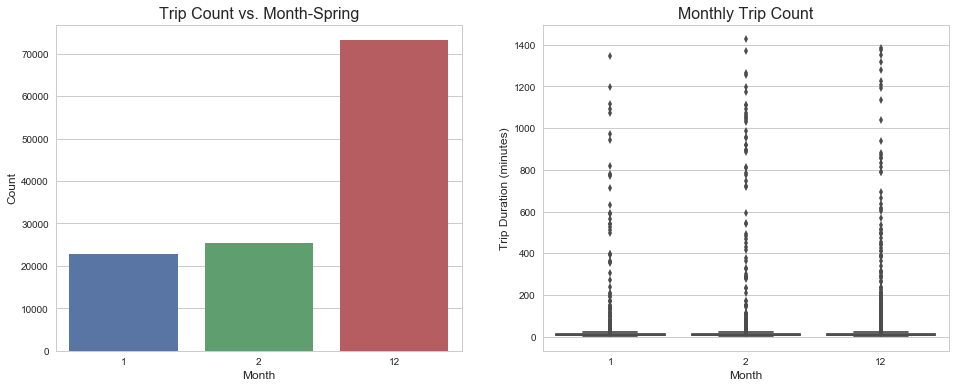

In [37]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='month', data=winter_df, ax=ax[0])
ax[0].set_title('Trip Count vs. Month-Spring', fontsize=16)
ax[0].set_xlabel('Month', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='month', y='Trip_Min', data=winter_df, ax=ax[1])
ax[1].set_title('Monthly Trip Count', fontsize=16)
ax[1].set_xlabel('Month', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()

# Yearly Data

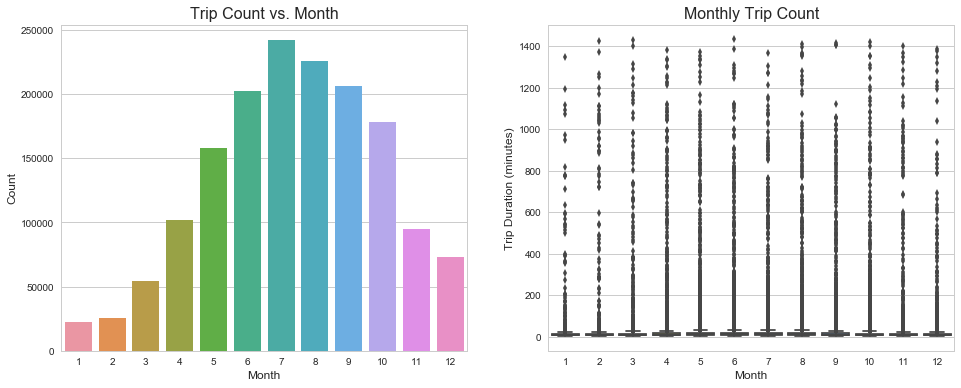

In [38]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='month', data=subscriber_data, ax=ax[0])
ax[0].set_title('Trip Count vs. Month', fontsize=16)
ax[0].set_xlabel('Month', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='month', y='Trip_Min', data=subscriber_data, ax=ax[1])
ax[1].set_title('Monthly Trip Count', fontsize=16)
ax[1].set_xlabel('Month', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()

## Daywise Data Visualization

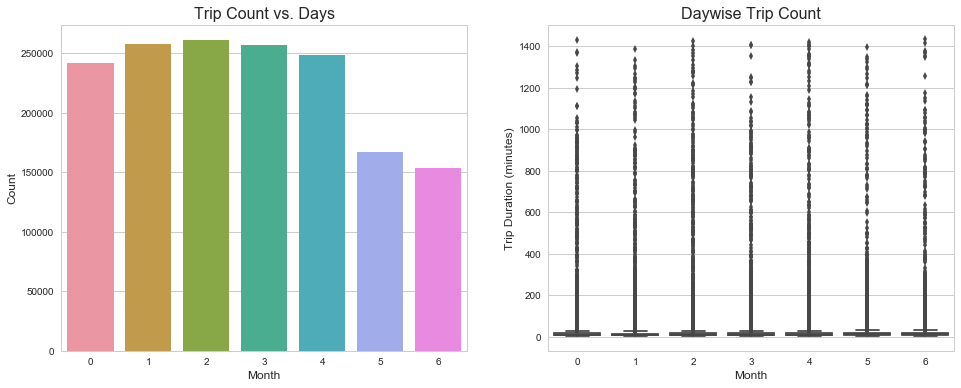

In [39]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='day', data=subscriber_data, ax=ax[0])
ax[0].set_title('Trip Count vs. Days', fontsize=16)
ax[0].set_xlabel('Month', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='day', y='Trip_Min', data=subscriber_data, ax=ax[1])
ax[1].set_title('Daywise Trip Count', fontsize=16)
ax[1].set_xlabel('Month', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()

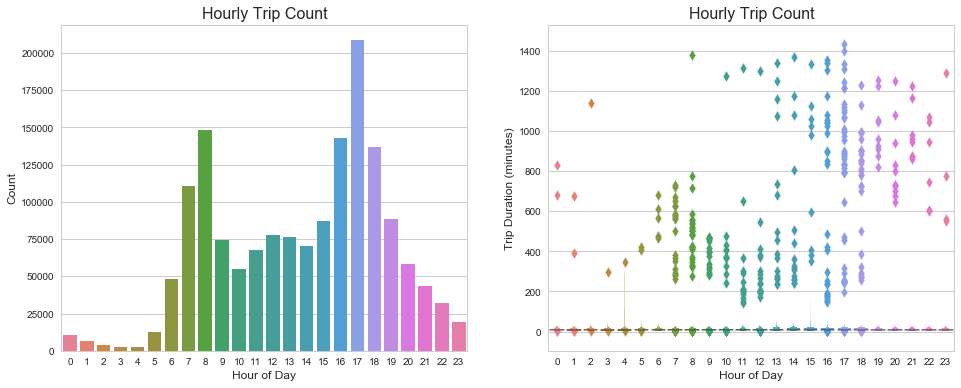

In [40]:
# Trip distribution per hour
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='hour', data=subscriber_data, ax=ax[0],palette='husl')
ax[0].set_title('Hourly Trip Count', fontsize=16)
ax[0].set_xlabel('Hour of Day', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.lvplot(x='hour', y='Trip_Min', data=spring_df, ax=ax[1],palette='husl')
ax[1].set_title('Hourly Trip Count', fontsize=16)
ax[1].set_xlabel('Hour of Day', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()

In [41]:
trip_details_DAY= summer_df[['day', 'Trip_Min']].groupby(['day']).count().reset_index()
trip_details_DAY

,day,Trip_Min
0,0,99286
1,1,104120
2,2,106347
3,3,109439
4,4,105613
5,5,72687
6,6,73023


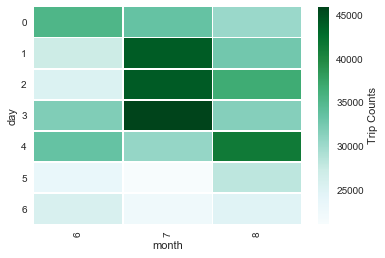

In [42]:
trip_details_monthly = summer_df[['day', 'month', 'Trip_Min']].groupby(['day', 'month']).count().reset_index()
temp=trip_details_monthly.pivot('day','month','Trip_Min')
sns.heatmap(temp, cbar_kws={'label': 'Trip Counts'},cmap="BuGn", linewidths=0.3)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()


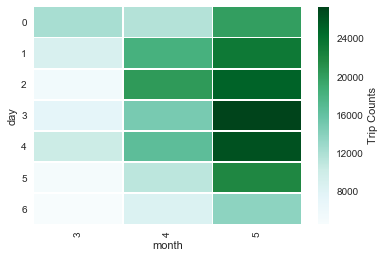

In [43]:
trip_details_monthly = spring_df[['day', 'month', 'Trip_Min']].groupby(['day', 'month']).count().reset_index()
temp=trip_details_monthly.pivot('day','month','Trip_Min')
sns.heatmap(temp, cbar_kws={'label': 'Trip Counts'},cmap="BuGn", linewidths=0.3)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

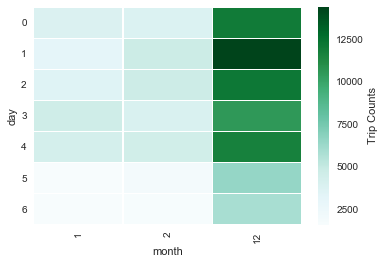

In [44]:
trip_details_monthly = winter_df[['day', 'month', 'Trip_Min']].groupby(['day', 'month']).count().reset_index()
temp=trip_details_monthly.pivot('day','month','Trip_Min')
sns.heatmap(temp, cbar_kws={'label': 'Trip Counts'},cmap="BuGn", linewidths=0.3)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

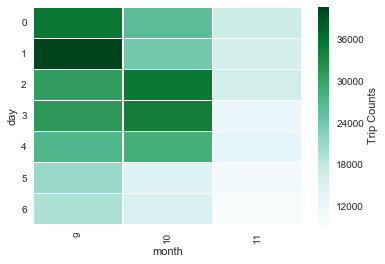

In [45]:
trip_details_monthly = fall_df[['day', 'month', 'Trip_Min']].groupby(['day', 'month']).count().reset_index()
temp=trip_details_monthly.pivot('day','month','Trip_Min')
sns.heatmap(temp, cbar_kws={'label': 'Trip Counts'},cmap="BuGn", linewidths=0.3)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

# Overall Heatmap

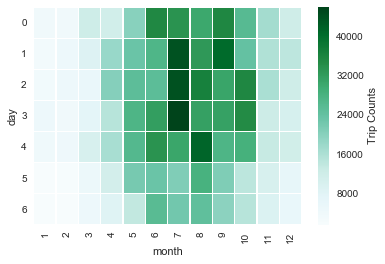

In [46]:
trip_details_yearly = subscriber_data[['day', 'month', 'Trip_Min']].groupby(['day', 'month']).count().reset_index()
temp=trip_details_yearly.pivot('day','month','Trip_Min')
sns.heatmap(temp, cbar_kws={'label': 'Trip Counts'},cmap="BuGn", linewidths=0.3)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [47]:
subscriber_data.dtypes

from_station_name            object
starttime            datetime64[ns]
tripduration                  int64
usertype                     object
gender                       object
birthyear                   float64
from_station_id               int64
to_station_id                 int64
to_station_name              object
year                          int32
month                         int32
week                          int32
day                           int32
hour                          int32
Trip_Min                    float64
Age                         float64
dtype: object

# Geographical Analysis based on latitude and longitudes of stations

In [48]:
#stations operative during 3rd and 4th quarter.
stations_q3 = pd.read_csv('Divvy_Stations_2014-Q3Q4.csv')

In [49]:
#stations operative during 1st and 2nd quarter.

stations_q4 = pd.read_excel('Divvy_Stations_2014-Q1Q2.xlsx')


In [50]:
#combining and keeping only single instance of duplicate ids

divvyStations = pd.concat([stations_q3, stations_q4], axis=0,sort=True).drop_duplicates(subset=['id'])
divvyStations.head()

,dateCreated,dpcapacity,id,latitude,longitude,name,online date
0,6/10/2013 10:46,19,5,41.873958,-87.627739,State St & Harrison St,NaT
1,6/22/2013 18:29,19,13,41.932500,-87.652681,Wilton Ave & Diversey Pkwy,NaT
2,6/22/2013 18:33,15,14,41.858086,-87.651073,Morgan St & 18th St,NaT
3,6/22/2013 18:35,15,15,41.856453,-87.656471,Racine Ave & 19th St,NaT
4,6/22/2013 18:55,15,16,41.910329,-87.672516,Wood St & North Ave,NaT


In [51]:
#Create dictionaries with id and co-ordinates to use for geographical plotting
lat_stn={}
lon_stn={}

for row in divvyStations.itertuples():
    lat_stn[(row.id)] = row.latitude
    lon_stn[(row.id)] = row.longitude
        

# PLOTTING GEOGRAPHICAL DATA WITH FOLIUM

In [207]:
import folium
from folium import plugins


In [208]:
m = folium.Map([41.8781, -87.6298], zoom_start=11)
stationArr = divvyStations[['latitude', 'longitude','id']].values



In [209]:
for i,row in divvyStations.iterrows():
    folium.CircleMarker((row['latitude'],row['longitude']),radius=12,popup=str(row['id']),fill_color="blue").add_to(m)

# Plotting Heatmap for Stations

In [210]:

m.add_child(plugins.HeatMap(stationArr, radius=15))
m

In [273]:
#mapping of lattitude and longitude based on station id in subscriber_data


In [275]:

subscriber_data['start_latitude'] = subscriber_data.from_station_id.map(lat_stn)
subscriber_data['start_longitude'] = subscriber_data.from_station_id.map(lon_stn)





# Trip Counts for Subscribers

In [276]:
dep = subscriber_data.groupby("from_station_id").count()
departure_counts = dep.iloc[:,[0]]
departure_counts.columns = ['Departures']
arrival_counts = subscriber_data.groupby("to_station_id").count().iloc[:,[0]]
arrival_counts.columns=['Arrivals']

locations = subscriber_data.groupby("from_station_id").first()
locations = locations.loc[:, ["start_latitude","start_longitude","to_station_name","Trip_Min","from_station_name","to_station_id"]]
trips = departure_counts.join(locations).join(arrival_counts)

trips.head()


,Departures,start_latitude,start_longitude,to_station_name,Trip_Min,from_station_name,to_station_id,Arrivals
from_station_id,,,,,,,,
5,5789,41.873958,-87.627739,May St & Cullerton St,21.616667,State St & Harrison St,171,6094
13,6451,41.932500,-87.652681,Racine Ave & Fullerton Ave,5.800000,Wilton Ave & Diversey Pkwy,87,5998
14,2250,41.858086,-87.651073,Halsted St & James M Rochford St,6.350000,Morgan St & 18th St,55,2150
15,2609,41.856453,-87.656471,Halsted St & James M Rochford St,11.700000,Racine Ave & 19th St,55,2448
16,4291,41.910329,-87.672516,Sheffield Ave & Webster Ave,9.516667,Wood St & North Ave,327,4172


# Plotting most used routes(not able to see on map.Please advice)

In [277]:
famous_route = trips.sort_values(by='Departures', ascending=False)
famous = famous_route.head(15)
type(famous_route)

pandas.core.frame.DataFrame

In [278]:
folium_map = folium.Map(location=[41.8781, -87.6298],zoom_start=13,width='50%')

    # for each row in the data, add a cicle marker
for index, row in famous_route.iterrows():
    #print((row["start_latitude"],row["start_longitude"]))

    
    points=(row["start_latitude"],row["start_longitude"])
    #print(points)
    x=folium.PolyLine(locations=points,weight=500,color ='red').add_to(folium_map)

    
  
            
folium_map

# Morning Ride Stations around 8 am

In [279]:
def getStationRideCountbyhour(hour):
    
    locations = subscriber_data.groupby("from_station_id").first()
    locations = locations.loc[:, ["start_latitude", "start_longitude","from_station_name", "to_station_name",'Trip_Min']]
    
    subset = subscriber_data[subscriber_data["hour"]==hour]
    departure_counts =  subset.groupby("from_station_id").count()
    departure_counts = departure_counts.iloc[:,[0]]
    departure_counts.columns= ["Departures"]
    
    
    arrival_counts =  subset.groupby("to_station_id").count().iloc[:,[0]]
    arrival_counts.columns= ["Arrivals"]

    
    trip_counts = departure_counts.join(locations).join(arrival_counts)
    return trip_counts
    
    
    
    

In [280]:
trip_counts_8=getStationRideCountbyhour(8)
trip_counts_8.head()

,Departures,start_latitude,start_longitude,from_station_name,to_station_name,Trip_Min,Arrivals
from_station_id,,,,,,,
5,636,41.873958,-87.627739,State St & Harrison St,May St & Cullerton St,21.616667,456
13,208,41.932500,-87.652681,Wilton Ave & Diversey Pkwy,Racine Ave & Fullerton Ave,5.800000,548
14,285,41.858086,-87.651073,Morgan St & 18th St,Halsted St & James M Rochford St,6.350000,40
15,259,41.856453,-87.656471,Racine Ave & 19th St,Halsted St & James M Rochford St,11.700000,20
16,414,41.910329,-87.672516,Wood St & North Ave,Sheffield Ave & Webster Ave,9.516667,99


In [281]:

folium_map = folium.Map(location=[41.8781, -87.6298],zoom_start=13,tiles="CartoDB dark_matter",width='50%')

    # for each row in the data, add a cicle marker
for index, row in trip_counts_8.iterrows():
    net_departures = (row["Departures"]-row["Arrivals"])
    
    popup_text = "{}<br> total departures: {}<br> total arrivals: {}<br> net departures: {}"
    popup_text = popup_text.format(row["from_station_name"],row["Arrivals"],row["Departures"],net_departures)
     # radius of circles
    radius = net_departures/50
    # choose the color of the marker
    if net_departures > 0:
        color="#FFC0CB"  #pink coloor
        
    else:
        color="#560319"   #reddish brown
        
    folium.CircleMarker(location=(row["start_latitude"],row["start_longitude"]),radius=radius,color=color,popup=popup_text,fill=True).add_to(folium_map)
        
        
folium_map
    

# Evening Ride Stations around 6pm

In [282]:
trip_counts_6=getStationRideCountbyhour(6)


In [234]:
folium_map = folium.Map(location=[41.8781, -87.6298],zoom_start=13,tiles="CartoDB dark_matter",width='50%')

    # for each row in the data, add a cicle marker
for index, row in trip_counts_6.iterrows():
    net_departures = (row["Departures"]-row["Arrivals"])
    
    popup_text = "{}<br> total departures: {}<br> total arrivals: {}<br> net departures: {}"
    popup_text = popup_text.format(row["from_station_name"],row["Arrivals"],row["Departures"],net_departures)
     # radius of circles
    radius = net_departures/50
    # choose the color of the marker
    if net_departures > 0:
        color="#FFC0CB"  #pink coloor
        
    else:
        color="#560319"   #reddish brown
        
    folium.CircleMarker(location=(row["start_latitude"],row["start_longitude"]),radius=radius,color=color,popup=popup_text,fill=True).add_to(folium_map)
        
        
folium_map

# subscribers with more than 30 minutes duration

In [284]:
from folium import plugins
from folium.plugins import HeatMap

folium_map = folium.Map(location=[41.8781, -87.6298],zoom_start=13,tiles="OpenStreetMap",width='50%')




# Ensure you're handing it floats
trips['Latitude'] = trips['start_latitude'].astype(float)
trips['Longitude'] = trips['start_longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_df = trips[trips['Trip_Min'] < 30] 
heat_df = heat_df[['start_latitude', 'start_longitude']]
heat_df = heat_df.dropna(axis=0, subset=['start_latitude','start_longitude'])

# List comprehension to make out list of lists
heat_data = [[row['start_latitude'],row['start_longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(folium_map)

# Display the map
folium_map



# Subscribers with trip duration greater than 30m

In [292]:
from folium import plugins
from folium.plugins import HeatMap

folium_map = folium.Map(location=[41.8781, -87.6298],zoom_start=13,tiles="OpenStreetMap",width='50%')




# Ensure you're handing it floats
trips['Latitude'] = trips['start_latitude'].astype(float)
trips['Longitude'] = trips['start_longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_df = trips[trips['Trip_Min'] > 30] 
heat_df = heat_df[['start_latitude', 'start_longitude']]
heat_df = heat_df.dropna(axis=0, subset=['start_latitude','start_longitude'])

# List comprehension to make out list of lists
heat_data = [[row['start_latitude'],row['start_longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(folium_map)

# Display the map
folium_map

In [293]:
customer_data['start_latitude'] = customer_data.from_station_id.map(lat_stn)
customer_data['start_longitude'] = customer_data.from_station_id.map(lon_stn)


customer_data.head()

,from_station_name,starttime,tripduration,usertype,gender,birthyear,from_station_id,to_station_id,to_station_name,year,month,week,day,hour,Trip_Min,Age,start_latitude,start_longitude
166847,Cannon Dr & Fullerton Ave,2014-07-19 17:57:00,7330,Customer,Male,1987.0,34,34,Cannon Dr & Fullerton Ave,2014,7,29,5,17,122.166667,27.0,41.926756,-87.634429
166890,Cannon Dr & Fullerton Ave,2014-07-19 17:55:00,7411,Customer,Male,1987.0,34,34,Cannon Dr & Fullerton Ave,2014,7,29,5,17,123.516667,27.0,41.926756,-87.634429
308461,Theater on the Lake,2014-07-08 21:32:00,1272,Customer,Male,1976.0,177,31,Franklin St & Chicago Ave,2014,7,28,1,21,21.200000,38.0,41.926277,-87.630834
308680,Michigan Ave & Oak St,2014-07-08 21:06:00,1401,Customer,Male,1976.0,85,177,Theater on the Lake,2014,7,28,1,21,23.350000,38.0,41.900960,-87.623777
308815,Clark St & Chicago Ave,2014-07-08 20:51:00,748,Customer,Male,1976.0,337,85,Michigan Ave & Oak St,2014,7,28,1,20,12.466667,38.0,41.896544,-87.630931


# Lets visualize customer data for less than 30m duration and greater than 30m duration

In [287]:
dep = customer_data.groupby("from_station_id").count()
departure_counts = dep.iloc[:,[0]]
departure_counts.columns = ['Departures']
arrival_counts = customer_data.groupby("to_station_id").count().iloc[:,[0]]
arrival_counts.columns=['Arrivals']

locations = customer_data.groupby("from_station_id").first()
locations = locations.loc[:, ["start_latitude","start_longitude","to_station_name","Trip_Min","from_station_name","to_station_id"]]
trips_customer = departure_counts.join(locations).join(arrival_counts).fillna(0)
#replaced Nan with 0 i.e.Arrivals column Nan



In [290]:
from folium import plugins
from folium.plugins import HeatMap

folium_map1 = folium.Map(location=[41.8781, -87.6298],zoom_start=13,tiles="OpenStreetMap",width='50%')


# Ensure you're handing it floats
trips_customer['Latitude'] = trips_customer['start_latitude'].astype(float)
trips_customer['Longitude'] = trips_customer['start_longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_df_cus = trips_customer[trips_customer['Trip_Min'] < 30] 
heat_df_cus = heat_df_cus[['start_latitude', 'start_longitude']]
heat_df_cus = heat_df_cus.dropna(axis=0, subset=['start_latitude','start_longitude'])

# List comprehension to make out list of lists
heat_data = [[row['start_latitude'],row['start_longitude']] for index, row in heat_df_cus.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(folium_map1)

# Display the map
folium_map1



In [291]:
from folium import plugins
from folium.plugins import HeatMap

folium_map1 = folium.Map(location=[41.8781, -87.6298],zoom_start=13,tiles="OpenStreetMap",width='50%')


# Ensure you're handing it floats
trips_customer['Latitude'] = trips_customer['start_latitude'].astype(float)
trips_customer['Longitude'] = trips_customer['start_longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_df_cus = trips_customer[trips_customer['Trip_Min'] > 30] 
heat_df_cus = heat_df_cus[['start_latitude', 'start_longitude']]
heat_df_cus = heat_df_cus.dropna(axis=0, subset=['start_latitude','start_longitude'])

# List comprehension to make out list of lists
heat_data = [[row['start_latitude'],row['start_longitude']] for index, row in heat_df_cus.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(folium_map1)

# Display the map
folium_map1

# Conclusion: